# Benchmark C1.2: Coupled problems - Water uptake by a static root system
by Daniel Leitner, Andrea Schnepf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import interp1d
import os
from van_genuchten import *

## Comparison of numerical solutions to reference solution

We compare different numerical codes by solving the benchmarking problems. In addition, we provide links to Jupyter Notebooks that describe the numerical implementation of a benchmark problem in a specific code should they be available in the sub-folder 'M3.2 Model descriptions'

### Result data format of C1.2




### Comparison to the analytical solution

We plot potential and actual transpiration

In [34]:
def sinusoidal(t): # to calculate potential transpiration
    return np.sin(2. * np.pi * np.array(t) - 0.5 * np.pi) + 1.

def plot_all(path):
    nrmse, names = [], []
    fig, ax = plt.subplots(2, 1, figsize=(14, 18))
    data = np.loadtxt(path +"reference", delimiter=';')  
    t_a=data[0,:] 
    y_a=data[1,:] 
    cumy_a = integrate.cumtrapz(data[1,:],data[0,:],initial=0)
    ax[0].plot(t_a, 6.4*sinusoidal(t_a), 'k', label = "potential transpiration")
    ax[0].plot(t_a,y_a,'r*', label = "DuMu$^x$ explicit interface")
    ax[0].set_xlabel("time (day)")
    ax[0].set_ylabel("transpiration (cm$^3$ day$^{-1}$)")
    ax[1].plot(t_a,integrate.cumtrapz(y_a,t_a,initial=0),'r*', label = "DuMu$^x$ explicit interface")
    ax[1].set_xlabel("time (day)")
    ax[1].set_ylabel("cumulative uptake (cm$^3$)")
    cc = 0
    for dirname, dirnames, filenames in os.walk(path+'.'):
        filenames.sort(key=str.lower)
        for i,f in enumerate(filenames):
            try:
                if f != "reference":                    
                    data = np.loadtxt(path+f,delimiter=';')  
                    t_ = data[0,data[0,:]<=3] 
                    a_ = data[1,data[0,:]<=3]
                    if f.endswith("_rhizo"): # rhizosphere model
                        if "SRI" not in f: 
                            cc -= 1; 
                        cc=max(cc,0) # last color 
                        ax[0].plot(t_,a_, color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "--")
                        ax[1].plot(t_,integrate.cumtrapz(a_,t_,initial=0), color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "--")                  
                    elif f.endswith("_ks"): # DuMux rhizosphere model with kernel support
                        cc -= 1 # last color
                        ax[0].plot(t_,a_, color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "-.")
                        ax[1].plot(t_,integrate.cumtrapz(a_,t_,initial=0), color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "-.")                                            
                    else: # other sink term
                        ax[0].plot(t_,a_, color = col[cc], label = f, linewidth = 1.5, alpha = 1)                        
                        ax[1].plot(t_,integrate.cumtrapz(a_,t_,initial=0), color = col[cc], label = f, linewidth = 1.5, alpha = 1)                  
                    cc += 1
                    # for table
                    interp = interp1d(t_, integrate.cumtrapz(a_,t_,initial=0),  kind='linear', fill_value='extrapolate', bounds_error =False ) 
                    cumy_n = interp(t_a) 
                    nrmse.append(nRMSE(cumy_a, cumy_n))
                    names.append(f)
            except Exception as ex:
                print("Something went wrong with file "+f)    
                raise
    #ax[0].legend(lwhite ,'upper right')
    #ax[1].legend(bbox_to_anchor =(0.0,1.1),loc = 'upper left',fontsize=20)
    ax[1].set_ylim(0,15) # fix y axis
    ax[0].tick_params(axis='x', labelsize=22)
    ax[0].tick_params(axis='y', labelsize=22)
    ax[0].xaxis.label.set_size(22); ax[0].yaxis.label.set_size(22)
    ax[1].tick_params(axis='x', labelsize=22)
    ax[1].tick_params(axis='y', labelsize=22)
    ax[1].xaxis.label.set_size(22); ax[1].yaxis.label.set_size(22)
    return nrmse, names                

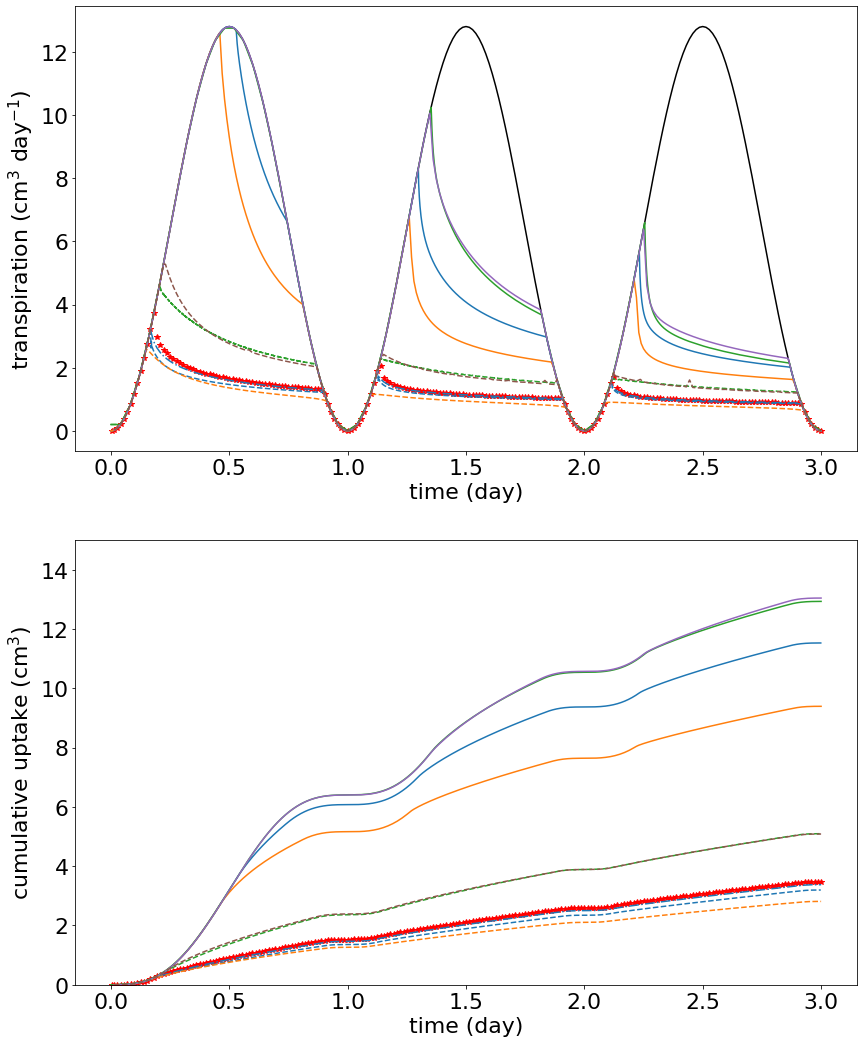

In [35]:
nrmsea, namea = plot_all("C1.2a Numerical results/")
plt.savefig('c12a_results.png', dpi=300, bbox_inches = "tight") 

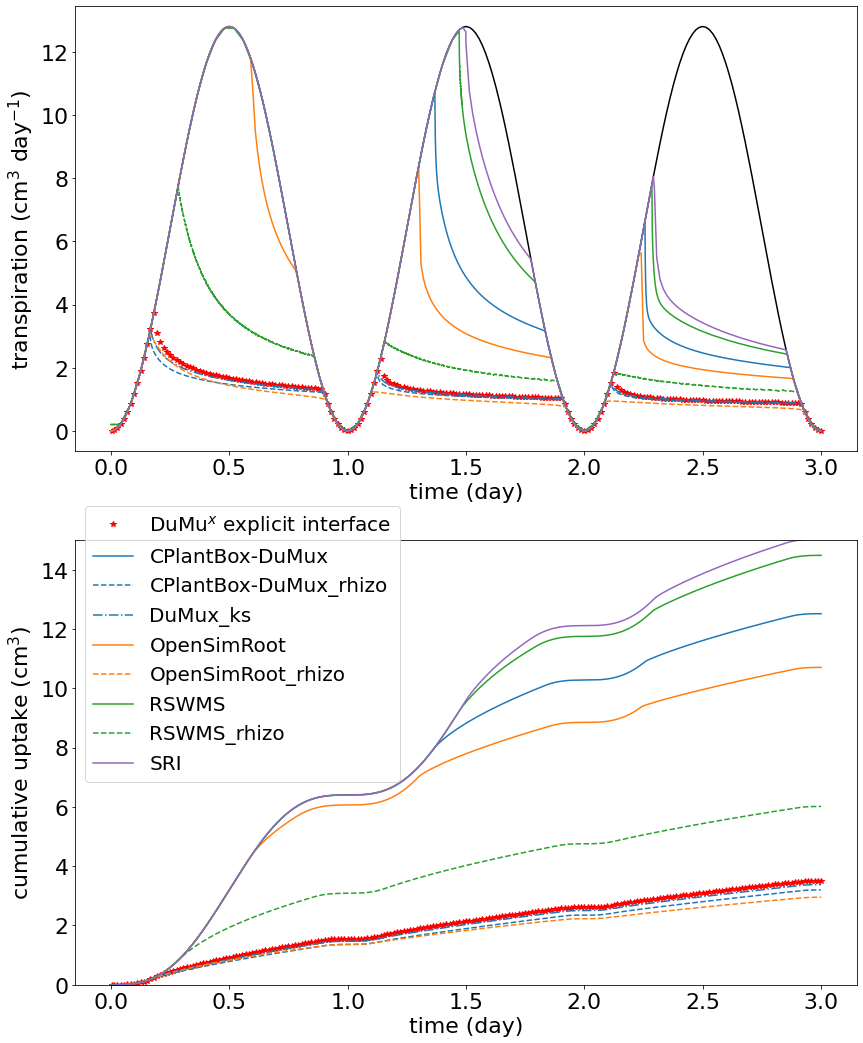

In [33]:
nrmseb, nameb = plot_all("C1.2b Numerical results/")
plt.savefig('c12b_results.png', dpi=300, bbox_inches = "tight") 

In [5]:
def plot_all(path):
    x=np.linspace(-0.5,-14.5,15)
    fig, axs = plt.subplots(3, 2)
    fig.set_size_inches(8, 14)
    fig.suptitle('Sink term depth profiles')
    cc = 0
    for dirname, dirnames, filenames in os.walk(path+'.'):
        filenames.sort(key=str.lower)
        for i,f in enumerate(filenames):
            try:
                data_ = np.loadtxt(path+f,delimiter=';')  
                if f.endswith("_rhizo"): # rhizosphere model
                    #if "SRI" not in f: 
                    cc -= 1; 
                    cc=max(cc,0) # last color               
                    k=0;
                    for i in range(0, 28):
                        if i in [4,8,12]:
                            axs[k,1].plot(-data_[i,:],x,color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "--"); i=i*6/24;
                            axs[k,1].set_title('%i days (midnight)'% i)
                            axs[k,1].plot([0,0],[-15,0],':',color='grey')        
                            axs[k,1].set_xlim(-0.2, 0.2)
                            k=k+1
                    k=0;
                    for i in range(0, 28):
                        if i in [2,6,10]:
                            axs[k,0].plot(-data_[i,:],x,color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "--"); i=i*6/24;
                            axs[k,0].plot([0,0],[-15,0],':',color='grey')
                            axs[k,0].set_title(format(i,".1f") + "days (noon)")
                            axs[k,0].set_xlim(-0.2, 2)
                            k=k+1
                elif f.endswith("_ks"): # DuMux rhizosphere model with kernel support
                    cc -= 1 # last color
                    k=0;
                    for i in range(0, 28):
                        if i in [4,8,12]:
                            axs[k,1].plot(data_[i,:],x,color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "-."); i=i*6/24;
                            axs[k,1].set_title('%i days (midnight)'% i)
                            axs[k,1].plot([0,0],[-15,0],':',color='grey')        
                            axs[k,1].set_xlim(-0.2, 0.2)
                            k=k+1
                    k=0;
                    for i in range(0, 28):
                        if i in [2,6,10]:
                            axs[k,0].plot(data_[i,:],x,color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "-."); i=i*6/24;
                            axs[k,0].plot([0,0],[-15,0],':',color='grey')
                            axs[k,0].set_title(format(i,".1f") + "days (noon)")
                            axs[k,0].set_xlim(-0.2, 2)
                            k=k+1                          
                elif f=="0reference": # reference solution
                    cc -= 1 # last color
                    k=0;
                    for i in range(0, 28):
                        if i in [4,8,12]:
                            axs[k,1].plot(data_[i,:],x,'r-', linewidth = 2, alpha = 0.5, label = "DuMu$^x$ explicit interface"); i=i*6/24;
                            axs[k,1].set_title('%i days (midnight)'% i)
                            axs[k,1].plot([0,0],[-15,0],':',color='grey')        
                            axs[k,1].set_xlim(-0.2, 0.2)
                            k=k+1
                    k=0;
                    for i in range(0, 28):
                        if i in [2,6,10]:
                            axs[k,0].plot(data_[i,:],x,'r-', linewidth = 2, alpha =0.5, label = "DuMu$^x$ explicit interface"); i=i*6/24;
                            axs[k,0].plot([0,0],[-15,0],':',color='grey')
                            axs[k,0].set_title(format(i,".1f") + "days (noon)")
                            axs[k,0].set_xlim(-0.2, 2)
                            k=k+1   
                else: # other sink term
                    k=0;
                    for i in range(0, 28):
                        if i in [4,8,12]:
                            axs[k,1].plot(-data_[i,:],x,color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "-"); i=i*6/24;
                            axs[k,1].set_title('%i days (midnight)'% i)
                            axs[k,1].plot([0,0],[-15,0],':',color='grey')        
                            axs[k,1].set_xlim(-0.2, 0.2)
                            k=k+1
                    k=0;
                    for i in range(0, 28):
                        if i in [2,6,10]:
                            axs[k,0].plot(-data_[i,:],x,color = col[cc], label = f, linewidth = 1.5, alpha = 1, linestyle = "-"); i=i*6/24;
                            axs[k,0].plot([0,0],[-15,0],':',color='grey')
                            axs[k,0].set_title(format(i,".1f") + "days (noon)")
                            axs[k,0].set_xlim(-0.2, 2)
                            k=k+1                        
                cc += 1
            except Exception as ex:
                print("Something went wrong with file "+f)    
                raise
    #axs[0,1].legend(loc = 'upper right')
    #axs[0,1].legend(bbox_to_anchor=(1.1, 1.05))
    axs[0,0].set_ylabel("depth (cm)")
    axs[1,0].set_ylabel("depth (cm)")
    axs[2,0].set_ylabel("depth (cm)")    
    axs[2,0].set_xlabel("sink (cm$^3$ day$^{-1}$)")
    axs[2,1].set_xlabel("sink (cm$^3$ day$^{-1}$)")
      
    return 

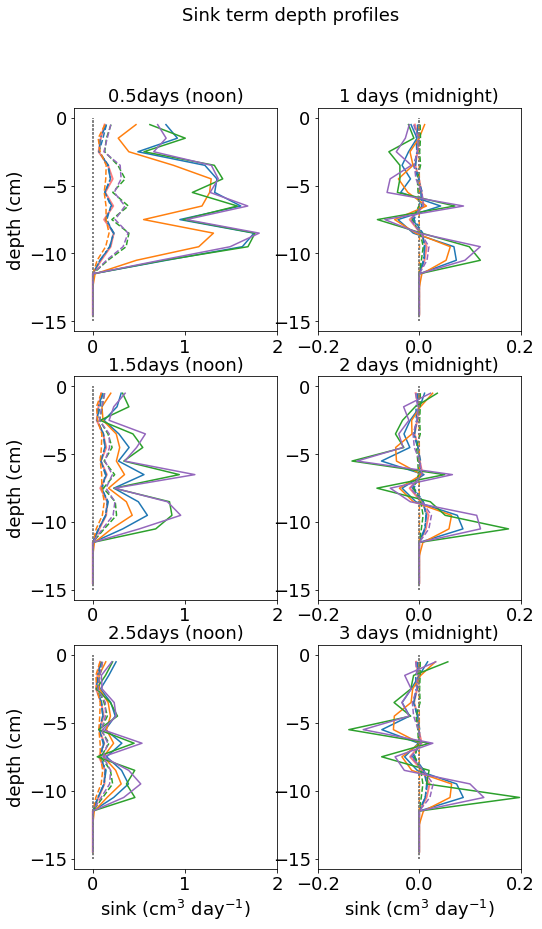

In [6]:
plot_all("C1.2a Numerical results - sinks/")
plt.savefig('c12a_results_sinks.png', dpi=300, bbox_inches = "tight") 

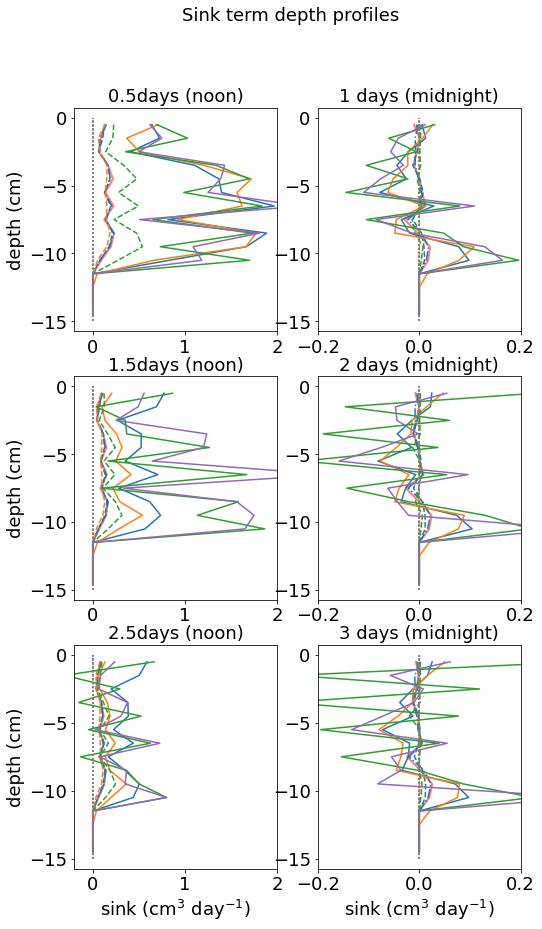

In [7]:
plot_all("C1.2b Numerical results - sinks/")
plt.savefig('c12b_results_sinks.png', dpi=300, bbox_inches = "tight") 

Additionally, we create a table using normalised RSME as an error measure (which were calculated in the cell above)

In [8]:
import pandas as pd 

data_ = np.array([namea, nrmsea, nrmseb]); #data_b = pandas.concat([data_, additional], axis=1)
data_ = np.array(data_.transpose())

df = pd.DataFrame(data_, columns = ['Name','nRSME (a)','nRSME (b)'] ) # Create the pandas DataFrame 
df['nRSME (a)'] = df['nRSME (a)'].astype(float)
df['nRSME (a)'] = df['nRSME (a)'].map('{:,.4f}'.format)
df['nRSME (b)'] = df['nRSME (b)'].astype(float)
df['nRSME (b)'] = df['nRSME (b)'].map('{:,.4f}'.format)
# print dataframe. 
df.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
]
).hide_index()

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0)
fig.savefig("table_c12.png")


C:\Users\a.schnepf\AppData\Local\Temp\ipykernel_54692\1844316225.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_ = np.array([namea, nrmsea, nrmseb]); #data_b = pandas.concat([data_, additional], axis=1)


ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

## References

Schnepf, A., Black, C.K., Couvreur, V., Delory, B.M., Doussan, C., Koch, A., Koch, T. et al. (2020) Call for participation: collaborative benchmarking of functional-structural root architecture models. The case of root water uptake. *Frontiers in Plant Science* 11, 316.